In [1]:
import numpy as np    
import pandas as pd    
import matplotlib.pyplot as plt  
import os  
import cartopy.crs as ccrs  
import cartopy.feature as cfeature  
import matplotlib.ticker as mticker  
from matplotlib.ticker import MultipleLocator, FuncFormatter
import xarray as xr  

In [14]:
df_1 = xr.open_dataset(r'G:\data\947\cmems_mod_glo_bgc_my_0.25deg_P1M-m_1721905663974.nc')
# df_1 = df_1.sel(time=df_1['time.season'] == 'MAM')
df_1 = df_1.mean(dim='time')
df_2 = xr.open_dataset(r'G:\data\1045\cmems_mod_glo_bgc_my_0.25deg_P1M-m_si-o2_125.00E-165.00E_5.00S-25.00N_1045.85m_1993-12-01-2022-12-01.nc')
# df_2 = df_2.sel(time=df_2['time.season'] == 'MAM')
df_2 = df_2.mean(dim='time')
merged_df = xr.merge([df_1, df_2], compat='override')
df = merged_df.mean(dim='depth')
df

<xarray.Dataset> Size: 157kB
Dimensions:    (latitude: 121, longitude: 161)
Coordinates:
  * latitude   (latitude) float32 484B -5.0 -4.75 -4.5 -4.25 ... 24.5 24.75 25.0
  * longitude  (longitude) float32 644B 125.0 125.2 125.5 ... 164.5 164.8 165.0
Data variables:
    o2         (latitude, longitude) float32 78kB 107.6 107.2 ... 48.66 48.57
    si         (latitude, longitude) float32 78kB 84.07 84.73 ... 114.6 114.6

In [3]:
# 自定义刻度格式化函数
def lon_formatter(x, pos):
    if x < 0:
        return f'{abs(int(x))}°W'
    elif x > 180:
        return f'{360-int(x)}°W'
    else:
        return f'{int(x)}°E'

def lat_formatter(x, pos):
    if x > 0:
        return f'{int(x)}°N' 
    else:
        return f'{int(x)}°S'

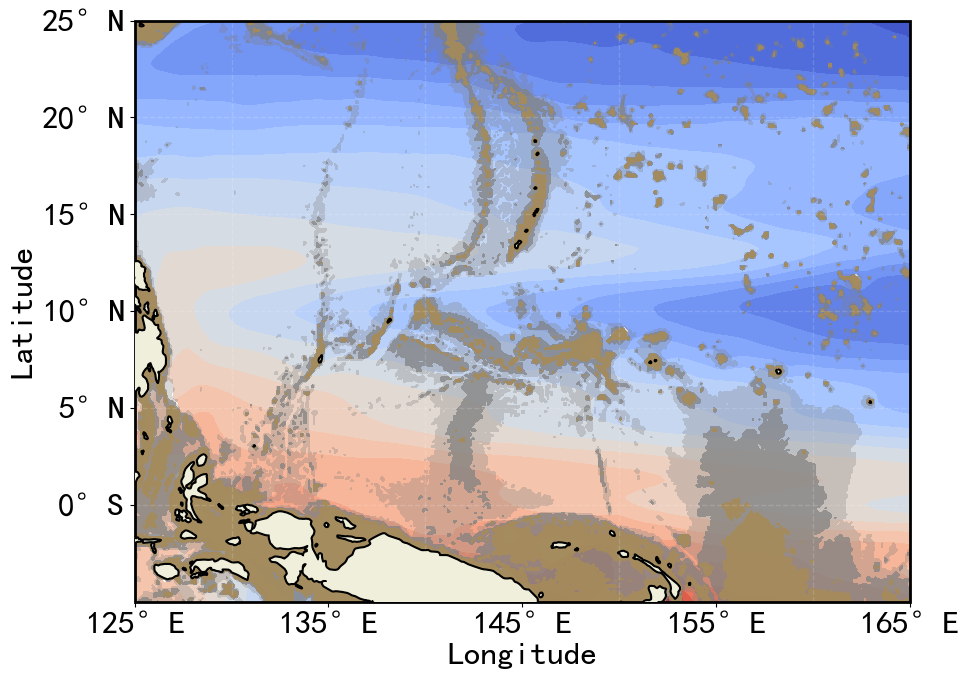

In [38]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['font.size'] = 24


longitude = df['longitude'].values
latitude = df['latitude'].values
o2 = df['o2'].values
sio = df['si'].values
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([125, 165.01, -5, 25.001], crs=ccrs.PlateCarree())

ax.contourf(longitude, latitude, o2, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())

######################################################################################################
import xarray as xr
ds = xr.open_dataset(r"E:\all_draw\data\Copernicus_bathy\cmems_mod_glo_phy_my_0.083deg_static_1720691864705.nc")
elevation = ds['deptho'].values
longitude = ds['longitude'].values
latitude = ds['latitude'].values
mask = elevation > 4000 
mask_1 = elevation > 2000
mask_2 = elevation > 3000
zhe_gai = ax.contourf(longitude, latitude, mask, levels=[0, 0.5], colors='grey', transform=ccrs.PlateCarree(), alpha = 0.3)
zhe_gai_1 = ax.contourf(longitude, latitude, mask_1, levels=[0, 0.5], colors='orange', transform=ccrs.PlateCarree(), alpha = 0.9)
zhe_gai_2 = ax.contourf(longitude, latitude, mask_2, levels=[0, 0.5], colors='grey', transform=ccrs.PlateCarree(), alpha = 0.7)
#######################################################################################################
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
gl = ax.gridlines(draw_labels=False, linewidth=1, color='white', alpha=0.15, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}
ax.set_xticks(np.arange(125, 165.001, 10))
ax.set_yticks(np.arange(0, 25.001, 5))
ax.xaxis.set_major_formatter(FuncFormatter(lon_formatter)) # type:ignore
ax.yaxis.set_major_formatter(FuncFormatter(lat_formatter)) # type:ignore
########################################################################################################
ax.spines[:].set_linewidth(2)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=2)
ax.add_feature(cfeature.COASTLINE, linewidth=2)
ax.add_feature(cfeature.RIVERS, linewidth=2)
ax.add_feature(cfeature.LAND, edgecolor='black', zorder=13)

plt.show()
  

In [4]:
df_2024 = pd.read_excel(r'D:\ze_1112\最新数据\NORC2022-09_Chl-a+营养盐_20240422更新_绘图使用数据.xls')
# df.dropna(inplace=True)
df_2024 = df_2024.rename(columns={'站位':'站位名'})
df_2021 = pd.read_excel(r'E:\all_draw\CTD\营养盐数据.xlsx')
df_2021['站位'] = df_2021['站位'].fillna(method='ffill')
df_2021 = df_2021.rename(columns={'站位':'站位名'})


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12536\2144448703.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_2021['站位'] = df_2021['站位'].fillna(method='ffill')


In [5]:
stations_2021 = []
for i in df_2021['站位名']:
    stations_2021.append(i)
stations_2021 = list(set(stations_2021))
print(stations_2021)
stations_2024 = []
for i in df_2024['站位名']:
    stations_2024.append(i)
stations_2024 = list(set(stations_2024))
print(stations_2024)

['QB02', 'FB01', 'Mk-03', 'E163-04', 'QB18', 'QB19', 'E142-10', 'E163-09', 'EQ-03', 'QB05', 'E163-08', 'E163-01', 'QB12', 'N3-01', 'QB07', 'E163-10', 'E163-05', 'E163-06', 'QB01', 'QB06', 'QB17', 'QB04', nan, 'QB09', 'QB15', 'E163-07', 'QB10', 'QB11', 'QB16', 'E163-02', 'N3-05', 'E142-07', 'QB03', 'QB08', 'E142-06', 'E142-5', 'QB-07new', 'QB14', 'FB02', 'N3-03', 'E163-03', 'E163-11']
['E130-11', 'N03-04', 'E130-03', 'E163-04', 'FB01', 'E140-08', 'E130-09', 'E130-04', 'E140-03orQB01', 'E163-06s', 'N03-02', 'E163-01', 'E130-10', 'E130-05', 'E130-13', 'N21-14', 'E130-06', 'E140-11', 'E163-05', 'E130-12', 'E163-06', 'E130-08', 'QB06', 'E140-07', 'QB04', 'N03-03', 'E130-14', 'E130-07', 'E163-07', 'N21-13', 'E163-02', 'QB08', 'E130-02', 'N21-12', 'QB03', 'QB07', 'E163-04s', 'E163-03', 'N21-10', 'N21-11']


In [6]:
import re

def dms_to_decimal(dms):
    # 使用正则表达式匹配度分秒格式，包括不同的分隔符和方向指示符
    match = re.match(r"(\d+)[°\s](\d+)[′'’\s](\d+(\.\d+)?)[\"\s]?(N|S|E|W)?", dms)
    if match:
        degrees = float(match.group(1))
        minutes = float(match.group(2))
        seconds = float(match.group(3))
        direction = match.group(5)
        decimal = degrees + (minutes / 60) + (seconds / 3600)
        if direction in ['S', 'W']:
            decimal = -decimal
        return decimal
    else:
        raise ValueError(f"无法解析的度分秒格式: {dms}")

# 自定义刻度格式化函数
def lon_formatter(x, pos):
    if x < 0:
        return f'{abs(int(x))}°W'
    elif x > 180:
        return f'{360-int(x)}°W'
    else:
        return f'{int(x)}°E'

def lat_formatter(x, pos):
    if x > 0:
        return f'{int(x)}°N' 
    else:
        return f'{int(x)}°S'

def dms_to_decimal_2024(dms):
    """将度分秒转换为十进制度数"""
    dms = dms.replace('°', ' ').replace('′', ' ').replace('″', ' ').replace('"E', ' ').replace('"N', ' ').replace('"S', ' ')
    parts = dms.split()
    degrees = float(parts[0])
    minutes = float(parts[1]) if len(parts) > 1 else 0
    seconds = float(parts[2]) if len(parts) > 2 else 0
    decimal = degrees + (minutes / 60) + (seconds / 3600)
    return decimal

In [7]:
stations_ctd_2021 = os.listdir(r'E:\all_draw\CTD\CTD')
lonlat = []  
for i in stations_ctd_2021:
    if i.endswith('.xls'):
        df = pd.read_excel(r'E:\all_draw\CTD\CTD\%s' % i, skiprows=1, header=1)
        df = df.drop(0)
        longitude = df['经度'].apply(dms_to_decimal).values # type: ignore
        latitude = df['纬度'].apply(dms_to_decimal).values  # type: ignore
        name = df['站位名'].values
        lonlat.append((longitude[3], latitude[3], name[3]))
lonlat = pd.DataFrame(lonlat, columns=['lon', 'lat', '站位名'])
data_path_2021 = pd.merge( lonlat, df_2021, on='站位名')

In [8]:
stations_ctd_2024 = os.listdir(r'D:\ze_1112\最新数据\CTD补上溶解氧_04共享航次计划调查资料汇交表')
lonlat = []  
for i in stations_ctd_2024:
    if i.endswith('.xls'):
        df = pd.read_excel(r'D:\ze_1112\最新数据\CTD补上溶解氧_04共享航次计划调查资料汇交表\%s' % i, skiprows=1, header=1)
        df = df.drop(0)
        longitude = df['经度'].apply(dms_to_decimal_2024).values # type: ignore
        latitude = df['纬度'].apply(dms_to_decimal_2024).values  # type: ignore
        name = df['站位名'].values
        lonlat.append((longitude[3], latitude[3], name[3]))
lonlat = pd.DataFrame(lonlat, columns=['lon', 'lat', '站位名'])
data_path_2024 = pd.merge( lonlat, df_2024, on='站位名')

In [16]:

#####################################绘制scatter###############################################
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['font.size'] = 24

longitude_q = df['longitude'].values
latitude_q = df['latitude'].values
sio4_q = df['si'].values

stations_path_2021 = []
for i in data_path_2021['站位名']:
    stations_path_2021.append(i)
stations_path_2021 = list(set(stations_path_2021))

stations_path_2024 = []
for i in data_path_2024['站位名']:
    stations_path_2024.append(i)
stations_path_2024 = list(set(stations_path_2024))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([135, 165.001, -5, 20.001], crs=ccrs.PlateCarree())
ax.contourf(longitude_q, latitude_q, sio4_q, levels=70, cmap='RdYlBu_r', transform=ccrs.PlateCarree(), vmin=75, vmax=115)
for station_path_2021 in stations_path_2021:
    data = data_path_2021[data_path_2021['站位名'] == station_path_2021]
    max_depth = data['深度(m)'].max()
    # data_2021 = data_path_2021[(data_path_2021['深度(m)'] >= 4800) & (data_path_2021['深度(m)'] <= 5200)]
    data_2021 = data_path_2021[data_path_2021['深度(m)'] == 1000]##########################################################################################
    station = data_2021['站位名']
    lon = data_2021['lon'].values
    lat = data_2021['lat'].values
    sio4_2021 = data_2021['硅酸盐'].values
    sc = ax.scatter(lon, lat, s=100, c=sio4_2021, cmap='RdYlBu_r', marker='o', alpha=1, edgecolors='k', transform=ccrs.PlateCarree(), zorder=10, linewidths=0.5, vmin=75, vmax=115)

for station_path_2024 in stations_path_2024:
    data = data_path_2024[data_path_2024['站位名'] == station_path_2024]
    max_depth = data['水深（m）'].max()
    # data_2024 = data_path_2024[(data_path_2024['水深（m）'] >= 4800) & (data_path_2024['水深（m）'] <= 5200)]
    data_2024 = data_path_2024[data_path_2024['水深（m）'] == 1000]##########################################################################################
    station = data_2024['站位名']
    long = data_2024['lon'].values
    lati = data_2024['lat'].values
    sio4_2024 = data_2024['SiO4-Si  (μmol/L)'].values
    sc2 = ax.scatter(long, lati, s=80, c=sio4_2024, cmap='RdYlBu_r', marker='^', alpha=1, edgecolors='gray', transform=ccrs.PlateCarree(), zorder=10, linewidths=0.5, vmin=75, vmax=115)
    
ax.spines[:].set_linewidth(2)
ax.add_feature(cfeature.BORDERS, linewidth=2)
ax.add_feature(cfeature.COASTLINE, linewidth=2)
ax.add_feature(cfeature.RIVERS, linewidth=2)
ax.add_feature(cfeature.LAND, edgecolor='black', zorder=9)
#####################################################
import xarray as xr
ds = xr.open_dataset(r"E:\all_draw\data\Copernicus_bathy\cmems_mod_glo_phy_my_0.083deg_static_1720691864705.nc")
elevation = ds['deptho'].values
longitude = ds['longitude'].values
latitude = ds['latitude'].values
mask = elevation > 4000 ##################################################################################################
mask_1 = elevation > 2000
mask_2 = elevation > 3000
zhe_gai = ax.contourf(longitude, latitude, mask, levels=[0, 0.5], colors='#C0C0C0', transform=ccrs.PlateCarree(), alpha = 1)
zhe_gai_2 = ax.contourf(longitude, latitude, mask_2, levels=[0, 0.5], colors='#808A87', transform=ccrs.PlateCarree(), alpha = 1)
zhe_gai_1 = ax.contourf(longitude, latitude, mask_1, levels=[0, 0.5], colors='#E3A869', transform=ccrs.PlateCarree(), alpha = 0.8)
######################################################
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
gl = ax.gridlines(draw_labels=False, linewidth=1, color='white', alpha=0.15, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}
ax.set_xticks(np.arange(125, 165.001, 10))
ax.set_yticks(np.arange(0, 25.001, 5))
ax.xaxis.set_major_formatter(FuncFormatter(lon_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(lat_formatter))  
    
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02, aspect=30, shrink=0.65)
cbar.set_label('SiO4 (μmol/L)', fontsize=18)
cbar.set_ticks(np.arange(75, 116, 5))
cbar.set_ticklabels(['75','80','85','90','95','100','105','110','115'])
# 添加图例
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='2021年数据',
                          markerfacecolor='none', markeredgecolor='k', markersize=10),
                   Line2D([0], [0], marker='^', color='w', label='2024年数据',
                          markerfacecolor='none', markeredgecolor='k', markersize=10)]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12,framealpha=0.8, fancybox=True)


# plt.show()
plt.savefig('2021vs2024vsCMEMS_1000_WUPIAN.png', bbox_inches='tight', dpi=300)
plt.close()